# Non Linear Regression Models

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [15]:
# Read in the data

df = pd.read_csv('nonlinear_data.txt')
df.head(100)

,FactoryID,Production_Rate
0,1,103
1,1,102
2,1,96
3,2,98
4,2,86
5,2,92
6,3,87
7,3,91
8,3,94
9,4,96


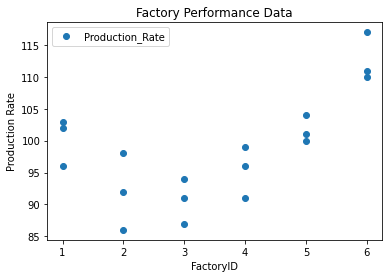

In [16]:
# plot the data

df.plot('FactoryID','Production_Rate',style='o')
plt.ylabel('Production Rate')
plt.title('Factory Performance Data')
plt.show()

Observations:

There appears to be a nonlinear trend with factory ID number.

In [18]:
result = sm.ols('Production_Rate ~ FactoryID',df,).fit()
print (result.summary())

print ()
print ("Indeed, a linear regression analysis confirms that there is some dependence of the production rate")
print ("on factory ID number.")

                            OLS Regression Results                            
Dep. Variable:        Production_Rate   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     7.913
Date:                Mon, 24 Aug 2020   Prob (F-statistic):             0.0125
Time:                        11:22:38   Log-Likelihood:                -59.549
No. Observations:                  18   AIC:                             123.1
Df Residuals:                      16   BIC:                             124.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.2444      3.771     23.666      0.0

In [19]:
# Extract information from the result object and plot along with the data.

yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

print (yint,slope,r2)

89.24444444444441 2.7238095238095106 0.3308988915558674


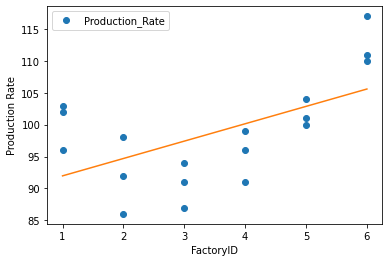

In [21]:
yfit = yint + slope*df['FactoryID']
x = df['FactoryID']

df.plot('FactoryID','Production_Rate',style='o')
plt.ylabel('Production Rate')
plt.plot(x,yfit)
plt.show()

## The key here is that we really need to include somehow the UNCERTAINTIES in the parameters in plotting the fit.  Otherwise, our fit is totally useless!!!!!

It turns out that it is actually quite a difficult mathematical exercise to do this.  Fortunately, Python has some utilities to help us.  Someday, maybe you will learn in detail why this works the way that it does (and you should).  But for now, we are going to just trust in the folks that wrote the software and assume that they got it right (which they did).

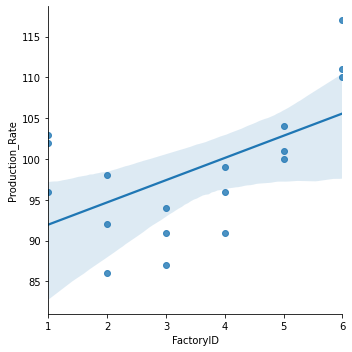

In [23]:
import seaborn as sns
sns.lmplot('FactoryID', 'Production_Rate', df, ci=95)

## Conclusion:  We see that there is a lot of data below the error band in the middle of the data set, and data above the error band at the ends.